In [1]:
using PyPlot, JLD, IntervalArithmetic, Statistics, StatsBase, Distributions

In [2]:
# lozi(x,y) = 1 - 1.8abs(x) + y, 0.35x
# function xacv(N,K=100)
#     x, y = 0.1rand(), 0.1rand()
#     for i = 1:10^4
#         x, y = lozi(x,y)
#     end
#     xh = Array{Float64}(undef,N)
#     for i = 1:N
#         x, y = lozi(x,y)
#         xh[i] = x
#     end
#     autocov(xh,0:K-1)
# end
# K = 101
# correlf_reg = Array{Float64}(undef,100,K)
# for i = 1:100
#     correlf_reg[i,:] = 4xacv(10^8,K)
# end
# save("../simulations/smoothcov.jld","correlf_reg",correlf_reg,"K",K)
@load "../simulations/smoothcov.jld"

2-element Vector{Symbol}:
 :K
 :correlf_reg

┌ Warning: JLD incorrectly extends FileIO functions (see FileIO documentation)
└ @ FileIO /Users/caro/.julia/packages/FileIO/JA3Vl/src/loadsave.jl:215
┌ Warning: JLD incorrectly extends FileIO functions (see FileIO documentation)
└ @ FileIO /Users/caro/.julia/packages/FileIO/JA3Vl/src/loadsave.jl:215


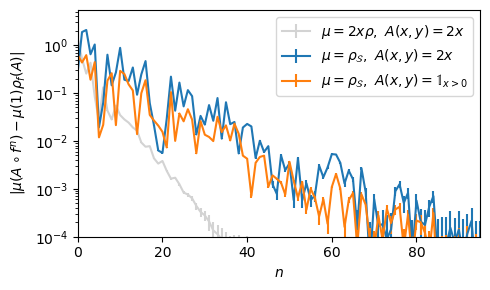

0.0001

In [6]:
figure(figsize=(5,3))
correlf_m = vec(mean(correlf_reg,dims=1))
correlf_s = vec(mapslices(sem,correlf_reg,dims=1))
correlf_ci = quantile(TDist(99),1-0.01/100) * correlf_s
errorbar(0:K-1,abs.(correlf_m),correlf_ci,label="\$\\mu = 2x\\rho,\\ A(x,y) = 2x\$",c="lightgray")

for (fname,scale,label) = [("",2,"\$\\mu = \\rho_{\\mathcal{S}},\\ A(x,y) = 2x\$"),("-hat",1,"\$\\mu = \\rho_{\\mathcal{S}},\\ A(x,y) = \\mathbb{1}_{x>0}\$")]
    L = load("../simulations/Conjecture2$fname.jld")
    correlf = scale*Interval{Float64}.(L["trespv"] .- L["tobsv"] .* L["wrespv"])
    correlf_m = vec(mean(correlf,dims=1))
    correlf_s = vec(mapslices(sem,correlf,dims=1))
    correlf_ci = quantile(TDist(99),1-0.01/100) * correlf_s
    errorbar(0:L["K"]-1,abs.(mid.(abs.(correlf_m))),sup.(correlf_ci),label=label)
    fill_between(0:L["K"]-1,inf.(abs.(correlf_m)),sup.(abs.(correlf_m)))
end

semilogy()
xlim(0,95); ylim(ymin=1e-4)
xlabel("\$n\$"); ylabel("\$|\\mu(A\\circ f^n) - \\mu(1)\\rho_f(A)|\$")
# yticks([1e-6,1e-4,1e-2,1])
# plt.text(0.01,0.01,"\$a = 1.8, b = 0.35\$",transform=gca().transAxes)
legend()
tight_layout()
savefig("../figures/Conjecture2.pdf")
ylim()[1]